In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

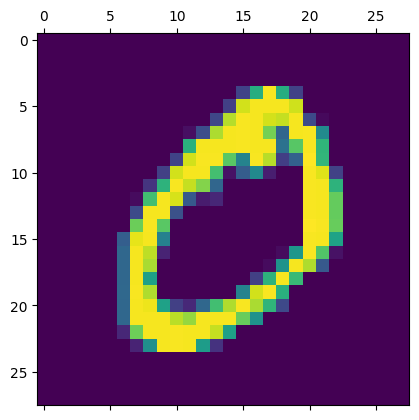

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#SCALING BW 0and1 (improves accuracy)
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9253


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9241


[0.26869556307792664, 0.9240999817848206]

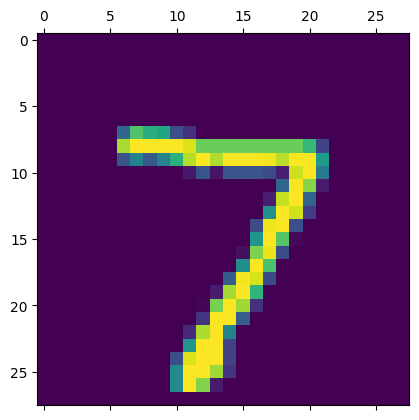

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 3ms/step


array([2.1614656e-02, 3.3293239e-07, 4.3103956e-02, 9.5368814e-01,
       2.3960902e-03, 1.3932666e-01, 1.6283916e-06, 9.9976611e-01,
       6.6128880e-02, 7.2071952e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    7,    5,    2,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    8,  928,   14,   11,    6,   12,   11,   35,    4],
       [   4,    0,   21,  907,    0,   38,    2,   11,   15,   12],
       [   1,    1,    5,    1,  916,    0,    9,    4,    7,   38],
       [   8,    2,    4,   21,   11,  799,   12,    4,   23,    8],
       [  10,    3,    7,    1,    8,   18,  907,    2,    2,    0],
       [   1,    6,   21,    6,    9,    2,    0,  942,    2,   39],
       [   7,    8,    8,   21,    9,   42,    9,   12,  840,   18],
       [   9,    6,    2,    9,   25,    8,    0,   18,    3,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

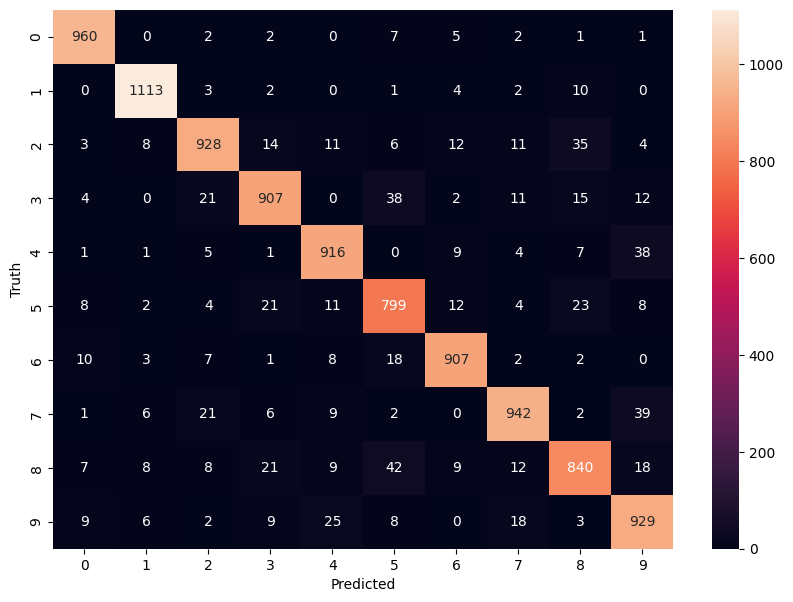

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Adding hidden Layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2707 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1198 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0820 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0628 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0496 - accuracy: 0.9846


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9746


[0.08057130128145218, 0.9746000170707703]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

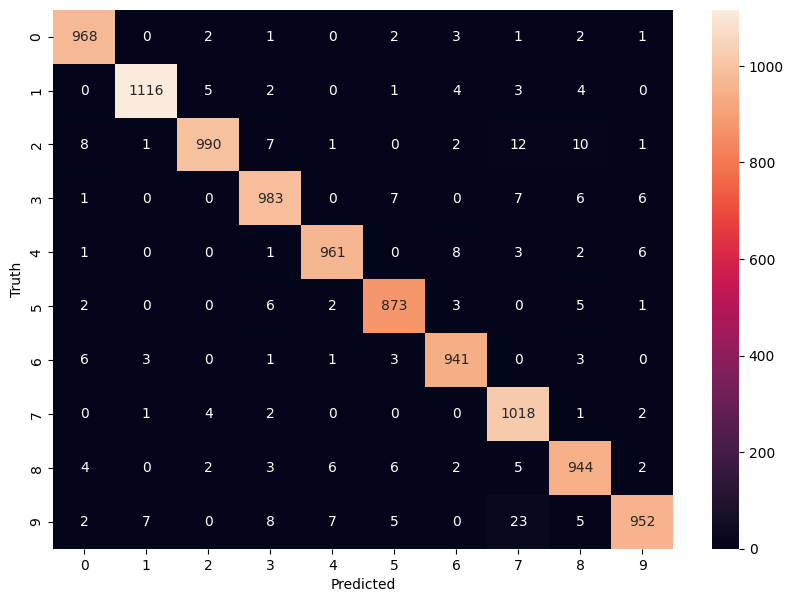

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Using keras flatten
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1210 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0631 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - accuracy: 0.9851


In [ ]:
#Try different epoch, optimizers and activation, loss functions

**ACTIVATION** **FUNCTIONS**

In [ ]:
#Use sigmoid in op layer (Binary Classification). All other places use tanh

In [ ]:
#Issues with sigmoid and tanh - Vanishing gradients problem( makes learning process very slow)

In [ ]:
#Then came ReLU = max(0,x)
#For hidden layers if you do not know which activation function to use, just use ReLU as default choice.
#Also has vanishing gradient because if value is less than 0, op is 0

In [ ]:
#Then came Leaky ReLU(z) = max(0.1x,x)


In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def tanh(x):
  return(math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def relu(x):
  return max(0,x)

def leaky_relu(x):
  return max(0.1*x, x)

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(1)

0.7310585786300049

In [ ]:
sigmoid(-56)

4.780892883885469e-25

In [ ]:
sigmoid(0.5)

0.6224593312018546

In [ ]:
tanh(100)

1.0

In [ ]:
tanh(-56)

-1.0

In [ ]:
tanh(50)

1.0

In [ ]:
tanh(1)

0.7615941559557649

In [ ]:
relu(-7)

0

In [ ]:
relu(1)

1

In [ ]:
leaky_relu(-100)

-10.0

In [ ]:
leaky_relu(100)

100

MATRIX

In [ ]:
import numpy as np

In [ ]:
revenue = np.array([[180,200,120],[24,36,40],[12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[8,10,10]])

In [ ]:
profit = revenue - expenses
profit

array([[100, 110,  20],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [ ]:
price_per_unit = np.array([1000,400,1200])
units = np.array([[30,40,50],[5,10,15],[2,5,7]])

In [ ]:
price_per_unit * units #Broadcasting

array([[30000, 16000, 60000],
       [ 5000,  4000, 18000],
       [ 2000,  2000,  8400]])

In [ ]:
total_sale = np.dot(price_per_unit,units)
total_sale

array([34400, 50000, 64400])

LOSS Functions


In [ ]:
#Squared error allows the gradient decent to converge better.

Take example i of training set, initialize random weights. y^ is found out and is compared with actual value (Supervised Learning)
The error is calculated abs(y-y^).
Now, second example is fed(Forward passing). Repeat process for all training samples, for n training samples, n errors are calculated.
Then error is summed to get total error.
It is further divided by the number of examples(n) to give Mean absolute error.
Each individual error is called loss.
MAE is called cost function.
Once all training samples are done its called an epoch.






For logisitic regression log loss or binary cross entropy cost function is used.

In [ ]:
import numpy as np

In [ ]:
y_predicted = np.array([1,1,0,0,1])
y_true = ([0.30,0.7,1,0,0.5])

In [ ]:
def mae(y_true, y_predicted):
  total_error = 0
  for yt, yp in zip(y_true, y_predicted):
    total_error += abs(yt-yp)
  print("Total error is:", total_error)

  mae = total_error / len(y_true)
  print("MAE is:", mae)


In [ ]:
mae(y_true, y_predicted)

Total error is: 2.5
MAE is: 0.5


In [ ]:
#Easier way to do mae using numpy
np.mean(np.abs(y_predicted - y_true))

0.5

In [ ]:
def mse(y_true, y_predicted):
  total_error = 0
  for yt, yp in zip(y_true, y_predicted):
    total_error += (yt-yp)*(yt-yp)
  print("Total error is:", total_error)

  mse = total_error / len(y_true)
  print("MSE is:", mse)

In [ ]:
mse(y_true, y_predicted)

Total error is: 1.83
MSE is: 0.366


In [ ]:
#Easier way to do mse using numpy
np.mean(np.square(y_predicted - y_true))

0.366

In [ ]:
np.log([0.00000000000000000001])

array([-46.05170186])

In [ ]:
epsilon = 1e-15

In [ ]:
y_predicted 

array([1, 1, 0, 0, 1])

In [ ]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [ ]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [ ]:
y_predicted_new = np.array(y_predicted_new)
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [ ]:
-np.mean(y_true_new*np.log(y_predicted_new) + (1-y_true_new) * np.log(1-y_predicted_new))

17.2696280766844

In [ ]:
def log_loss(y_true,y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  y_true_new = np.array(y_true)
  return -np.mean(y_true_new*np.log(y_predicted_new) + (1-y_true_new) * np.log(1-y_predicted_new))

In [ ]:
log_loss(y_true,y_predicted)

17.2696280766844

array([0.7, 0.3, 0. , 1. , 0.5])

HEART OF ML - GRADIENT DESCENT

In [ ]:
#Used during training of a nn

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data/insurance_data.csv"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/insurance_data.csv")

In [ ]:
#Preprocessing
df['bought_insurance'] = df['bought_insurance'].replace([2],1)
#Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordability']],df.bought_insurance, test_size=0.2, random_state=25)

In [ ]:
X_train

,age,affordability
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1
19,18,1
25,54,1
16,25,0
20,21,1
3,52,0


In [ ]:
len(X_train)

21

In [ ]:
df.shape

(27, 3)

In [ ]:
#Scaling (age bw 0 and 1) We are doing this to bring age and affordability on the same scale.
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [ ]:
X_train_scaled.head()

,age,affordability
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


In [ ]:
#kernel_initializer = initialweights
model = keras.Sequential([
    keras.layers.Dense(1,input_shape =(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer ='adam',
    loss ='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 0.5067 - accuracy: 0.7619
Epoch 2067/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5067 - accuracy: 0.7619
Epoch 2068/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5066 - accuracy: 0.7619
Epoch 2069/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5066 - accuracy: 0.7619
Epoch 2070/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5065 - accuracy: 0.7619
Epoch 2071/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5065 - accuracy: 0.7619
Epoch 2072/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5064 - accuracy: 0.7619
Epoch 2073/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5064 - accuracy: 0.7619
Epoch 2074/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5064 - accuracy: 0.7619
Epoch 2075/5000
1/1 [==============================] 

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 247ms/step - loss: 0.3456 - accuracy: 0.8333


[0.3455779254436493, 0.8333333134651184]

In [ ]:
X_test_scaled

,age,affordability
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
#Anything more than 0.5, label becomes 1, else 0
model.predict(X_test_scaled)

1/1 [==============================] - 0s 79ms/step


array([[0.76754946],
       [0.39608768],
       [0.15774845],
       [0.5338377 ],
       [0.7868423 ],
       [0.8781275 ]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [ ]:
#To get trained weights
coef, intercept = model.get_weights()
coef, intercept

(array([[5.5735126],
        [1.6991647]], dtype=float32),
 array([-3.1241903], dtype=float32))

In [ ]:
def sigmoid(x):
  import math
  return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
def prediction_function(age,affordability):
  weighted_sum = coef[0]*age + coef[1]*affordability + intercept
  return sigmoid(weighted_sum)

In [ ]:
prediction_function(.47, 1)

0.7675494230112755

In [ ]:
prediction_function(.18,1)

0.39608767045607324

GRADIENT DECENT IMPLEMENTATION

In [ ]:
import numpy as np

In [ ]:
def log_loss(y_true,y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  y_true_new = np.array(y_true)
  return -np.mean(y_true_new*np.log(y_predicted_new) + (1-y_true_new) * np.log(1-y_predicted_new))

In [ ]:
#Takes a vector/nparray
def sigmoid_numpy(X):
  return 1 / (1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
#Gradient function:
def gradient_decent(age,affordability,y_true,epochs,loss_threshold):
  # w1,w2,bias
  w1 = w2 = 1
  bias = 0
  rate = 0.5
  n = len(age)

  for i in range(epochs):
    weighted_sum = w1*age + w2*affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)
    
    loss = log_loss(y_true, y_predicted)

    w1d = (1/n)*np.dot(np.transpose(age),(y_predicted - y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted - y_true))

    bias_d = np.mean(y_predicted-y_true)

    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d
    bias = bias - rate * bias_d

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss<=loss_threshold:
      break

  return w1,w2,bias

In [ ]:
gradient_decent(X_train_scaled['age'],X_train_scaled['affordability'],y_train,1000,0.4130)

0     1.22
13    0.29
6     0.55
17    1.58
24    1.50
19    1.18
25    1.54
16    0.25
20    1.21
3     0.52
7     0.60
1     0.25
5     1.56
26    1.23
8     1.62
18    0.19
12    0.27
23    1.45
22    1.40
15    1.55
4     1.46
dtype: float64


(1, 1, 0)

In [ ]:
coef, intercept

(array([[5.5735126],
        [1.6991647]], dtype=float32),
 array([-3.1241903], dtype=float32))

In [ ]:
X_train_scaled['age'].transpose

<bound method IndexOpsMixin.transpose of 0     0.22
13    0.29
6     0.55
17    0.58
24    0.50
19    0.18
25    0.54
16    0.25
20    0.21
3     0.52
7     0.60
1     0.25
5     0.56
26    0.23
8     0.62
18    0.19
12    0.27
23    0.45
22    0.40
15    0.55
4     0.46
Name: age, dtype: float64>

**NEURAL NETWORK FROM SCRATCH**

In [ ]:
class myNN():
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def fit(self, X, y, epochs, loss_threshold):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordability'], y, epochs, loss_threshold)

  def predict(self, X_test):
    weighted_sum = self.w1*X_test['age'] + self.w1*X_test['affordability'] +self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self,age,affordability,y_true,epochs,loss_threshold):
    # w1,w2,bias
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)

    for i in range(epochs):
      weighted_sum = w1*age + w2*affordability + bias
      y_predicted = sigmoid_numpy(weighted_sum)
      
      loss = log_loss(y_true, y_predicted)

      w1d = (1/n)*np.dot(np.transpose(age),(y_predicted - y_true))
      w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted - y_true))

      bias_d = np.mean(y_predicted-y_true)

      w1 = w1 - rate * w1d
      w2 = w2 - rate * w2d
      bias = bias - rate * bias_d

      if i%50==0:
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

      if loss<=loss_threshold:
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        break

    return w1,w2,bias
  

In [ ]:
class Mynn():
  def __init__(self):
    self.w1 =1
    self.w2 =1
    self.bias =0
  
  def predict(self):
    pass
  
  def fit(self, X, y, epochs, loss_threshold):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordability'], y, epochs, loss_threshold)
  
  def sigmoid_np(X):
    return 1 / (1 + np.exp(-X))

  def log_loss(y_true, y_predicted):
    eps = 1e-15
    y_predicted_processed = [max(eps,i) for i in y_predicted]
    y_predicted_processed = [min(1-eps,i) for i in y_predicted_processed]
    y_predicted_processed = np.array(y_predicted_processed)

    y_true = np.array(y_true)
    return -np.mean(y_true*np.log(y_predicted_processed) + (1-y_true) * np.log(1-y_predicted))

  def gradient_descent(self,age, affordability, y_true, epochs, loss_threshold):
    w1 = w2 = 1
    bias = 0
    n = len(age)
    rate = 0.5
    for i in range(epochs):
      weighted_sum = w1*age + w2*affordability + bias
      y_predicted = 1 / (1 + np.exp(-weighted_sum))

      loss = log_loss(y_true, y_predicted)

      w1d = (1/n)*(np.dot(np.transpose(age),(y_predicted-y_true)))
      w2d = (1/n)*(np.dot(np.transpose(affordability),(y_predicted-y_true)))
      bias_d = np.mean(y_predicted-y_true)

      w1 = w1 - rate*w1d
      w2 = w2 - rate*w2d

      bias = bias - rate*bias_d
      
      if i % 50 == 0:
        print(f'epoch:{i},w1:{w1},w2:{w2},bias:{bias} loss:{loss}')

      if loss<=loss_threshold:
        print(f'epoch:{i},w1:{w1},w2:{w2},bias:{bias} loss:{loss}')
        break

    return w1,w2,bias



In [ ]:
customModel = Mynn()
customModel.fit(X_train_scaled, y_train, epochs=500, loss_threshold=0.4130)


epoch:0,w1:0.9826009738830817,w2:0.965210718860606,bias:-0.09949736021942848 loss:0.6657455469538763
epoch:50,w1:1.584361723197093,w2:1.2808555802400319,bias:-1.2316615680958156 loss:0.5384773066487856
epoch:100,w1:2.333908701143997,w2:1.5024574939778497,bias:-1.6972249977290008 loss:0.5049431881802899
epoch:150,w1:3.0331326378318746,w2:1.5949889778707547,bias:-2.0477929267959647 loss:0.4799885809135941
epoch:200,w1:3.6732955742991487,w2:1.641258732104013,bias:-2.339522629309191 loss:0.46002291441370985
epoch:250,w1:4.255579718761512,w2:1.671537211321194,bias:-2.595287817329603 loss:0.44374531355192737
epoch:300,w1:4.784618355997595,w2:1.6970088938530152,bias:-2.825464150587075 loss:0.4303562126897466
epoch:350,w1:5.265923520853135,w2:1.7216151640457464,bias:-3.0353990631790824 loss:0.4192643268685023
epoch:383,w1:5.560065612832769,w2:1.738008377305884,bias:-3.164468786136962 loss:0.41297607579435064


In [ ]:
customModel = Mynn()
customModel.fit(X_train_scaled, y_train, epochs=500, loss_threshold=0.4130)

epoch:0,w1:0.9826009738830817,w2:0.965210718860606,bias:-0.09949736021942848 loss:0.6657455469538763
epoch:50,w1:1.584361723197093,w2:1.2808555802400319,bias:-1.2316615680958156 loss:0.5384773066487856
epoch:100,w1:2.333908701143997,w2:1.5024574939778497,bias:-1.6972249977290008 loss:0.5049431881802899
epoch:150,w1:3.0331326378318746,w2:1.5949889778707547,bias:-2.0477929267959647 loss:0.4799885809135941
epoch:200,w1:3.6732955742991487,w2:1.641258732104013,bias:-2.339522629309191 loss:0.46002291441370985
epoch:250,w1:4.255579718761512,w2:1.671537211321194,bias:-2.595287817329603 loss:0.44374531355192737
epoch:300,w1:4.784618355997595,w2:1.6970088938530152,bias:-2.825464150587075 loss:0.4303562126897466
epoch:350,w1:5.265923520853135,w2:1.7216151640457464,bias:-3.0353990631790824 loss:0.4192643268685023
epoch:383,w1:5.560065612832769,w2:1.738008377305884,bias:-3.164468786136962 loss:0.41297607579435064


In [ ]:
customModel.predict(X_train_scaled)

0     0.973886
13    0.174790
6     0.473417
17    0.996390
24    0.994379
19    0.967592
25    0.995495
16    0.144990
20    0.972434
3     0.432113
7     0.542788
1     0.144990
5     0.995967
26    0.975263
8     0.997108
18    0.108316
12    0.159326
23    0.992591
22    0.990240
15    0.995738
4     0.992989
dtype: float64

In [ ]:
model.predict(X_train_scaled)

1/1 [==============================] - 0s 45ms/step


array([[0.45044997],
       [0.18125443],
       [0.48531464],
       [0.859073  ],
       [0.79604083],
       [0.39608768],
       [0.8298651 ],
       [0.15048371],
       [0.43669453],
       [0.4437482 ],
       [0.55475885],
       [0.15048371],
       [0.84503007],
       [0.46428153],
       [0.8839677 ],
       [0.1125232 ],
       [0.16529565],
       [0.7470717 ],
       [0.6909105 ],
       [0.8375903 ],
       [0.75745744]], dtype=float32)

In [ ]:
X_test_scaled

,age,affordability
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


STOCHASTIC GRADIENT DESCENT

Use one (randomly picked sample foir a forward pass and then adjust weights). Used when training set is very big and we dont want too much computation.

MINI Batch DG: 
Like SGD but will use a batch of randomly picked training samples

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Data/homeprices_bangalore.csv"
df = pd.read_csv(path)

In [ ]:
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
14,2250,3,101.0
3,1521,3,75.0
8,1310,3,50.0
6,2732,4,135.0


In [ ]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [ ]:
#SCALING MinMax() = brings it bw 0 and 1
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [ ]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_Y.reshape(scaled_Y.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [ ]:
np.dot(w,scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [ ]:
w = np.ones(shape = (2))

**BATCH GRADIENT DESCENT**

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  
  number_of_features = X.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]


  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]),500)
w ,b , cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

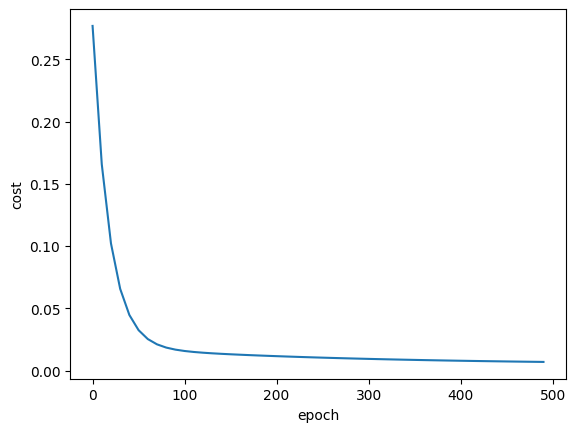

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [ ]:
def predict(area, bedrooms,w, b):
  scaled_X = sx.transform([[area,bedrooms]])[0]

  scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [ ]:
sx.transform([[1000,2]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.06896552, 0.25      ]])

**STOCHASTIC GRADIENT DESCENT**

In [ ]:
import random
#generate a random integer between 0 and 6
random.randint(0,6)

0

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  #numpy array with 1 row and 3 columns. 
  #number_of_features = 3 ;(area,bedroom and age)
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    #generate random sample
    random_index = random.randint(0, total_samples - 1)

    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100 == 0: 
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list
  
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70472389, 0.67414537]), -0.22600965112453253, 0.004262721073061013)

In [ ]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

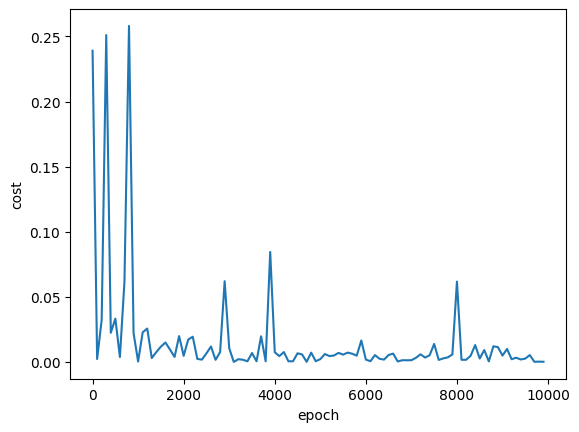

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [ ]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.7969171558942

In [ ]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  #numpy array with 1 row and 3 columns. 
  #number_of_features = 3 ;(area,bedroom and age)
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    #generate random sample
    random_index = random.randint(0, total_samples - 1)

    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100 == 0: 
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list
  
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]),10000)
w_sgd, b_sgd, cost_sgd

Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD.
In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1]
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list=[]
  epochs_list= []

  for i in range(epochs):
    
    y_predicted = np.dot(w,X.T) + b

    cost = np.mean(np.square(y_true - y_predicted))

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*(y_true-y_predicted)

    w = w - learning_rate*w_grad
    b =  b - learning_rate*b_grad

    

SyntaxError: ignored

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_Y.reshape(scaled_Y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71014484, 0.67813449]), -0.23340665225111312, 0.004304890501813963)

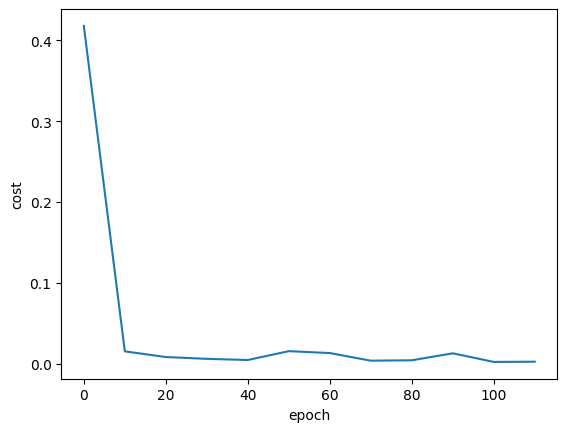

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.65645895500737